# Análisis de resultados experimentales

### Lectura de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

path_knn = 'Resultados/knn/'
path_radial_basis = 'Resultados/radial_basis_kernel/'
path_linear = 'Resultados/linear_kernel/'



#  KNN
knn_bootstrap = pd.read_csv(path_knn + 'bootstrap.csv', index_col=0, sep=";")


### Número de características vs. Número de cortes

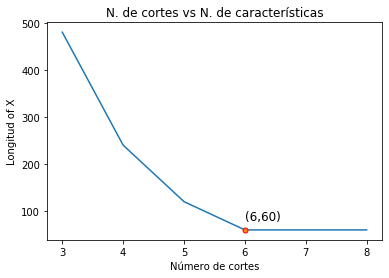

In [2]:
pairs = knn_bootstrap[['Number of cuts','Length of X']].copy()
pairs.drop_duplicates(inplace=True)


length_x = pairs['Length of X'].tolist()
number_of_cuts = pairs['Number of cuts'].tolist()

plt.plot(number_of_cuts,
         length_x)

plt.plot(6,60,marker="o", markersize=5, markeredgecolor="red")

plt.text(6, 80, '(6,60)', fontsize=12)
plt.title("N. de cortes vs N. de características")
plt.xlabel("Número de cortes")
plt.ylabel("Longitud of X")
plt.show()

# K Nearest Neighbor (KNN)

## Bootstrap

#### Matriz de correlaciones entre datos experimentales

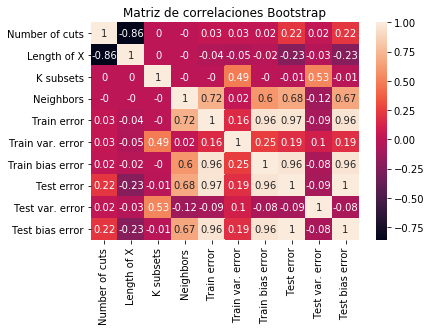

In [3]:
corrMatrix= knn_bootstrap.corr()
corrMatrix = corrMatrix.round(2)
sn.heatmap(corrMatrix, annot=True)
plt.title("Matriz de correlaciones Bootstrap")
plt.show()

### Número de subsets vs. Error

#### Training

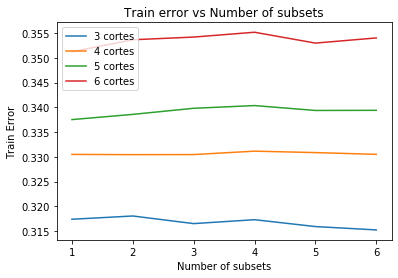

In [4]:
number_of_cuts = range(3,7,1)
number_of_cuts
fixed_k = 5

for cut in number_of_cuts:
    filtered_data = knn_bootstrap[(knn_bootstrap['Number of cuts'] == cut) & (knn_bootstrap['Neighbors'] == fixed_k)]
    plt.plot(filtered_data['K subsets'],filtered_data['Train error'], label = f'{cut} cortes')
    
plt.legend(loc="upper left")
plt.title("Train error vs Number of subsets")
plt.xlabel("Number of subsets")
plt.ylabel("Train Error")
plt.show()

#### Test

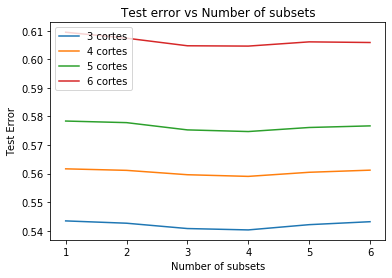

In [5]:
number_of_cuts = range(3,7,1)
fixed_k = 1

for cut in number_of_cuts:
    filtered_data = knn_bootstrap[(knn_bootstrap['Number of cuts'] == cut) & (knn_bootstrap['Neighbors'] == fixed_k)]
    plt.plot(filtered_data['K subsets'],filtered_data['Test error'], label = f'{cut} cortes')
    
plt.legend(loc="upper left")
plt.title("Test error vs Number of subsets")
plt.xlabel("Number of subsets")
plt.ylabel("Test Error")
plt.show()

### Número de cortes vs. Error

#### Training

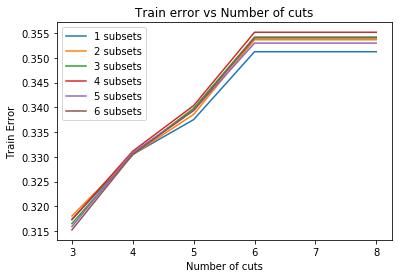

In [6]:
k_subsets = knn_bootstrap['K subsets'].unique()
k_subsets
fixed_k = 5

for k_subset in k_subsets:
    filtered_data = knn_bootstrap[(knn_bootstrap['K subsets'] == k_subset) & (knn_bootstrap['Neighbors'] == fixed_k)]
    plt.plot(filtered_data['Number of cuts'],filtered_data['Train error'], label = f'{k_subset} subsets')
    
    
plt.legend(loc="upper left")
plt.xlabel("Number of cuts")
plt.title("Train error vs Number of cuts")
plt.ylabel("Train Error")
plt.show()

### Test

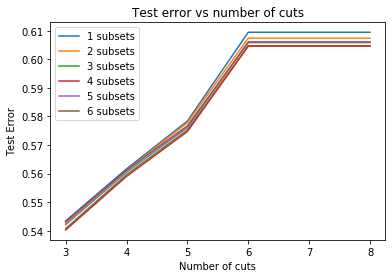

In [7]:
k_subsets = knn_bootstrap['K subsets'].unique()
k_subsets
fixed_k = 1

for k_subset in k_subsets:
    filtered_data = knn_bootstrap[(knn_bootstrap['K subsets'] == k_subset) & (knn_bootstrap['Neighbors'] == fixed_k)]
    plt.plot(filtered_data['Number of cuts'],filtered_data['Test error'], label = f'{k_subset} subsets')
    
plt.legend(loc="upper left")
plt.xlabel("Number of cuts")
plt.title("Test error vs number of cuts")
plt.ylabel("Test Error")
plt.show()

### Cantidad de vecinos (K) vs Error

#### Training

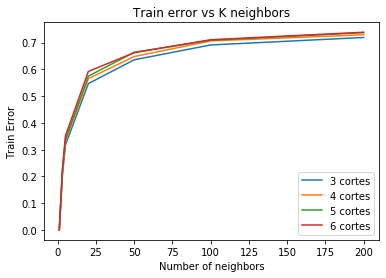

In [8]:
number_of_cuts = range(3,7,1)
number_of_cuts
fixed_subset = 1

for cut in number_of_cuts:
    filtered_data = knn_bootstrap[(knn_bootstrap['Number of cuts'] == cut) & (knn_bootstrap['K subsets'] == fixed_subset)]
    plt.plot(filtered_data['Neighbors'],filtered_data['Train error'], label = f'{cut} cortes')

plt.legend(loc="lower right")
plt.title("Train error vs K neighbors")
plt.xlabel("Number of neighbors")
plt.ylabel("Train Error")
plt.show()

#### Test

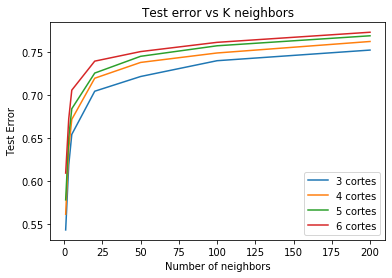

In [9]:
number_of_cuts = range(3,7,1)
number_of_cuts
fixed_subset = 1

for cut in number_of_cuts:
    filtered_data = knn_bootstrap[(knn_bootstrap['Number of cuts'] == cut) & (knn_bootstrap['K subsets'] == fixed_subset)]
    plt.plot(filtered_data['Neighbors'],filtered_data['Test error'], label = f'{cut} cortes')
    
plt.legend(loc="lower right")
plt.title("Test error vs K neighbors")
plt.xlabel("Number of neighbors")
plt.ylabel("Test Error")
plt.show()

### Varianza vs Subsets 

#### Training

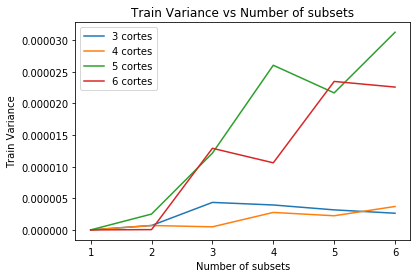

In [10]:
number_of_cuts = range(3,7,1)
fixed_k = 200
neighbors = [1, 3, 5, 20, 50, 100, 200]

for cut in number_of_cuts:
    filtered_data = knn_bootstrap[(knn_bootstrap['Number of cuts'] == cut) & (knn_bootstrap['Neighbors'] == fixed_k)]
    plt.plot(filtered_data['K subsets'],filtered_data['Train var. error'], label = f'{cut} cortes')
    
plt.legend(loc="upper left")
plt.title("Train Variance vs Number of subsets")
plt.xlabel("Number of subsets")
plt.ylabel("Train Variance")
plt.show()

#### Test

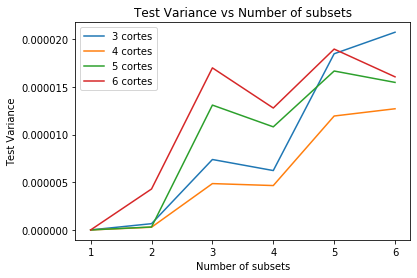

In [11]:
number_of_cuts = range(3,7,1)
fixed_k = 1

for cut in number_of_cuts:
    filtered_data = knn_bootstrap[(knn_bootstrap['Number of cuts'] == cut) & (knn_bootstrap['Neighbors'] == fixed_k)]
    plt.plot(filtered_data['K subsets'],filtered_data['Test var. error'], label = f'{cut} cortes')
    
plt.legend(loc="upper left")
plt.title("Test Variance vs Number of subsets")
plt.xlabel("Number of subsets")
plt.ylabel("Test Variance")
plt.show()

### Cantidad de vecinos (k) vs Bias

#### Training

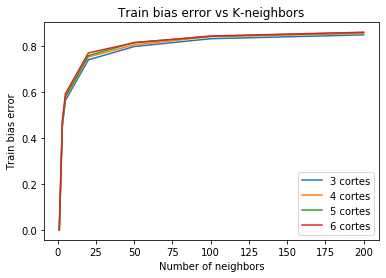

In [12]:
number_of_cuts = range(3,7,1)
number_of_cuts
fixed_subset = 1

for cut in number_of_cuts:
    filtered_data = knn_bootstrap[(knn_bootstrap['Number of cuts'] == cut) & (knn_bootstrap['K subsets'] == fixed_subset)]
    plt.plot(filtered_data['Neighbors'],filtered_data['Train bias error'], label = f'{cut} cortes')
    
plt.legend(loc="lower right")
plt.title("Train bias error vs K-neighbors")
plt.xlabel("Number of neighbors")
plt.ylabel("Train bias error")
plt.show()

#### Test

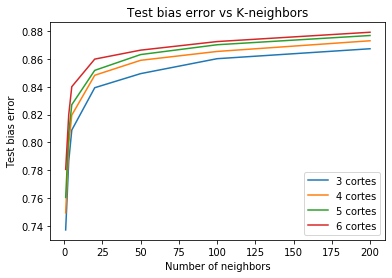

In [13]:
number_of_cuts = range(3,7,1)
number_of_cuts
fixed_subset = 1

for cut in number_of_cuts:
    filtered_data = knn_bootstrap[(knn_bootstrap['Number of cuts'] == cut) & (knn_bootstrap['K subsets'] == fixed_subset)]
    plt.plot(filtered_data['Neighbors'],filtered_data['Test bias error'], label = f'{cut} cortes')
    
plt.legend(loc="lower right")
plt.title("Test bias error vs K-neighbors")
plt.xlabel("Number of neighbors")
plt.ylabel("Test bias error")
plt.show()

### Selección mayor y peor error

In [14]:
knn_bootstrap.sort_values(by='Test bias error', ascending = True, inplace = True)
modelo_menor_bias = knn_bootstrap[:1]

knn_bootstrap.sort_values(by='Test bias error', ascending = False, inplace = True)
modelo_mayor_bias = knn_bootstrap[:1]


modelo_mayor_bias
modelo_menor_bias

,Number of cuts,Length of X,K subsets,Neighbors,Train error,Train var. error,Train bias error,Train list errors,Test error,Test var. error,Test bias error,Test list errors
21,3,480,4,1,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0]",0.540317,0.000006,0.735059,"[0.54347, 0.541852, 0.537067, 0.53888]"
